## Importing and Merging the Datasets
We will start by importing the necessary libraries and the two datasets. The first dataset contains benign traffic and the second dataset contains malicious traffic. We will create a new column in each dataset named 'class' which will have value 0 for all rows in the benign dataset and value 1 for all rows in the malicious dataset. We will then merge the two datasets into one using pd.concat().

In [1]:
# First we have to import the libraries
import pandas as pd
import numpy as np

In [2]:
# Here we are going to import the first benign dataset fron 'data' folder
benign = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_benign.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 0 for all the rows
benign['class'] = 0 # This is because we assume that all the data dns traffic in that dataset is benign

# Here we are going to import the first benign dataset fron 'data' folder
benign_2 = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-benign_1.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 0 for all the rows
benign_2['class'] = 0 # This is because we assume that all the data dns traffic in that dataset is benign

# Now we are going to import the first malicious dataset from 'data' folder
malicious = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_compressed.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 1 for all the rows
malicious['class'] = 1 # This is because we assume that all the data dns traffic in that dataset is malicious

malicious_2 = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-heavy_compressed.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 1 for all the rows
malicious_2['class'] = 1 # This is because we assume that all the data dns traffic in that dataset is malicious

# Now we are going to merge both the datasets
data_merged = pd.concat([benign, benign_2, malicious, malicious_2])


In [3]:
# To avoid bias we are going to shuffle the dataset
data = data_merged.sample(frac=1).reset_index(drop=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the longest_word column
data['longest_word'] = le.fit_transform(data['longest_word'])

# Encode the sld column
data['sld'] = le.fit_transform(data['sld'])

## Preprocessing the Data
Before splitting the dataset, we need to clean the data. First, we will remove the columns "longest_word" and "sld". Then, we will remove any rows with NaN values using data.dropna(). We will also normalize the numerical data using MinMaxScaler().

In [47]:
# Before splitting the dataset, we have to clean the dataset. 
# Firs we are going to remove the columns "longest_word" and "sld"
data = data.drop(['timestamp'], axis=1)

# Then lets remove NaN values from the dataset
data = data.dropna()

# Print head of the dataset
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,class
0,10,0,0,9,0,2.375000,1,2,7,4.500000,foot,walfoot,8,0,0
1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
2,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1


In [8]:
# Lets normalize the numerical data
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the data on the scaler object
data[['FQDN_count', 'subdomain_length', 'entropy', 'len', 'longest_word', 'sld']] = scaler.fit_transform(data[['FQDN_count', 'subdomain_length', 'entropy', 'len', 'longest_word', 'sld']])

# Print head of the dataset
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,class
0,0.411765,0.000000,0,14,0,0.600987,2,3,10,4.666667,0.693123,0.370180,0.272727,0,0
1,0.705882,0.310345,0,10,10,0.608137,6,6,7,3.500000,0.000168,0.005141,0.333333,1,0
2,0.264706,0.000000,0,10,0,0.519600,1,2,7,5.000000,0.644643,0.630402,0.181818,0,0
3,0.441176,0.103448,0,15,0,0.594141,2,3,9,5.000000,0.476980,0.460399,0.333333,1,0
4,0.647059,0.241379,0,10,8,0.442238,6,6,7,3.166667,0.000337,0.007957,0.272727,1,0


## Splitting the Dataset and Training the Random Forest Classifier
Now we can split the dataset into training and testing data using train_test_split(). We will use 80% of the data for training and 20% for testing. We will then create the Random Forest Classifier with n_estimators=100 and max_depth=5, and fit the model using the training data. We will test the model using the testing data and calculate the accuracy using accuracy_score().

In [48]:
# After preparing the dataset, lets import sklearn libraries. In this project we are going to use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Now lets split the dataset into training and testing data
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Now lets create the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

# Now lets train the model
model.fit(X_train, y_train)

# Now lets test the model
y_pred = model.predict(X_test)

# Now lets check the accuracy of the model
accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

ValueError: could not convert string to float: 'mechelen'

In [10]:
# Now lets perform cross validation to be sure we are not overfitting the model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on your data
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the mean cross-validation score
print("Mean CV score: {:.2f}".format(cv_scores.mean())) # This is the mean accuracy of the model and as seen it is 0.85, which is close to the accuracy of the model, so we can say that we are not overfitting the model on the training data and it will do well on the testing new data

Mean CV score: 0.81


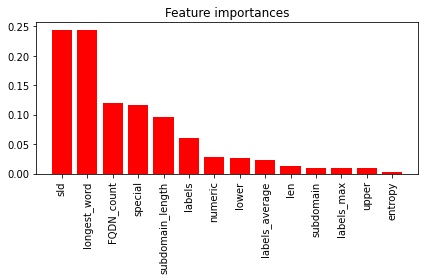

In [11]:
import matplotlib.pyplot as plt

# Now lets plot the feature importance to understand which features are more important
importances = model.feature_importances_

# get the names of the features
feature_names = X_train.columns.values

# sort the features by their importance score in descending order
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [12]:
# Now lets save the model
import joblib

# Save the model as a joblib file
joblib.dump(model, 'C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Out\\RandomForest.joblib')

['C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Out\\RandomForest.joblib']

In [13]:
data_test = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\Test\\Image_attack.csv')

# Before splitting the dataset, we have to clean the dataset. 
# Firs we are going to remove the columns "longest_word" and "sld"
data_test = data_test.drop(['timestamp'], axis=1)

# Then lets remove NaN values from the dataset
data_test = data_test.dropna()

# Encode the longest_word column
data_test['longest_word'] = le.fit_transform(data_test['longest_word'])

# Encode the sld column
data_test['sld'] = le.fit_transform(data_test['sld'])

In [14]:
np.set_printoptions(precision=5, suppress=True)
print(model.predict(data_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
def get_packet_labels(predictions, threshold_1=0.4, threshold_2=0.7):
    """
    Returns a list of packet labels based on the given probability thresholds.

    Args:
    - predictions: list of tuples containing the predicted probabilities for each packet
    - threshold_1: probability threshold for assigning the "suspicious" label
    - threshold_2: probability threshold for assigning the "attack" label

    Returns:
    - list of packet labels (one of "benign", "suspicious", or "attack") for each packet
    """
    labels = []
    for p in predictions:
        if p[1] < threshold_1:
            labels.append("benign")
        elif p[1] > threshold_2:
            labels.append("attack")    
        elif p[1] > threshold_1 and p[1] < threshold_2:
            labels.append("suspicious")
        
    return labels